In [6]:
import itertools
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix

df = pd.read_csv('news.csv')

df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size=0.2)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
# Fit/transform train, test sets with TfidfVectorizer
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

# Initialize PassiveAggressiveClassifier and find accuracy of model
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
y_pred = pac.predict(tfidf_test)
acc = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(acc*100,2)}%')

Accuracy: 93.05%


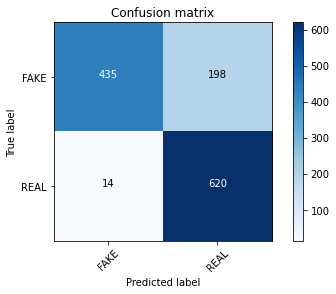

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
from sklearn.naive_bayes import MultinomialNB

def show_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    # plot confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
   

clf = MultinomialNB()
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)

cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
show_matrix(cm, classes=['FAKE', 'REAL'])